In [8]:
! code .

## 多目的進化計算ライブラリPlatypus
https://qiita.com/TatsuyaKatayama/items/ccdc51d8d9570b30c538

### Platypus 概要
基本的にドキュメントのGetting Startedを解説.

Pythonで使える多目的進化アルゴリズムのフレームワーク
Deap,PyGMO,Scipyと違い多目的に特化している
NSGA-II, NSGA-III, MOEA/D, IBEA, Epsilon-MOEA, SPEA2, GDE3, OMOPSO, SMPSO, Epsilon-NSGA-IIをサポート
カモノハシ
多目的な遺伝的アルゴリズムのフレームワークに,自然淘汰されずに生き残ってきたPlatpus(カモノハシ)の名前を付けるあたりセンスを感じる

## 例題1

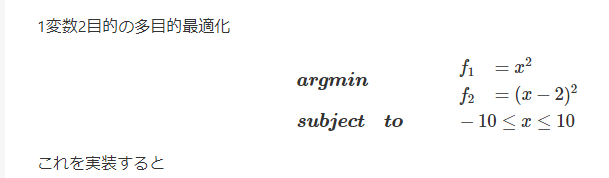

In [3]:
from platypus import NSGAII, Problem, Real

def schaffer(x):
    return [x[0]**2, (x[0]-2)**2]

problem = Problem(1, 2)
problem.types[:] = Real(-10, 10)
problem.function = schaffer

algorithm = NSGAII(problem)
algorithm.run(10000)

見通しが良い.クラスを作ることがないので初心者受けも良い.  
Problemの引数は(変数の数,目的関数の数)で, 変数は-10～10の連続値で定義されている

パレート解はalgorithm.resultの中に保存されている

In [2]:
print("x\t f1\t f2")

for solution in algorithm.result:
    print("%0.3f\t%0.3f\t%0.3f" \
          % tuple(solution.variables + solution.objectives[:]))

x	 f1	 f2
-0.000	0.000	4.002
2.000	4.000	0.000
1.086	1.178	0.836
0.750	0.563	1.562
0.708	0.501	1.669
1.919	3.681	0.007
0.555	0.308	2.087
1.655	2.738	0.119
0.455	0.207	2.387
0.263	0.069	3.017
1.725	2.977	0.075
0.587	0.345	1.996
1.617	2.615	0.147
0.224	0.050	3.156
0.339	0.115	2.758
0.534	0.286	2.148
0.859	0.738	1.302
0.511	0.262	2.216
0.829	0.688	1.371
0.365	0.133	2.673
0.140	0.020	3.459
1.814	3.289	0.035
0.490	0.240	2.281
0.407	0.166	2.538
0.321	0.103	2.819
1.035	1.071	0.932
1.970	3.882	0.001
1.316	1.731	0.468
1.346	1.813	0.427
0.203	0.041	3.228
1.941	3.769	0.003
1.234	1.522	0.587
0.166	0.027	3.365
1.595	2.543	0.164
1.863	3.472	0.019
1.799	3.236	0.040
1.128	1.273	0.760
0.970	0.942	1.060
1.423	2.024	0.333
0.925	0.856	1.155
0.907	0.822	1.195
1.888	3.566	0.012
0.426	0.182	2.476
1.837	3.375	0.027
1.054	1.112	0.894
0.893	0.797	1.227
1.465	2.147	0.286
1.696	2.876	0.093
0.818	0.669	1.397
1.992	3.967	0.000
0.125	0.016	3.514
1.955	3.821	0.002
0.439	0.193	2.436
1.114	1.240	0.785
1.780	3.168	0.048

## 例題2

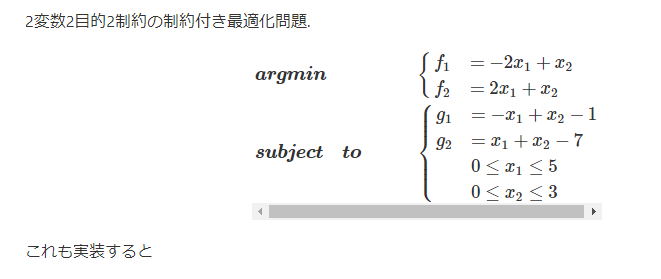

In [4]:
from platypus import NSGAII, Problem, Real

def belegundu(vars):
    x1 = vars[0]
    x2 = vars[1]
    return [-2*x1 + x2, 2*x1 + x2], [-x1 + x2 - 1, x1 + x2 - 7]

problem = Problem(2, 2, 2)
problem.types[:] = [Real(0, 5), Real(0, 3)]
problem.constraints[:] = "<=0"
problem.function = belegundu

algorithm = NSGAII(problem)
algorithm.run(10000)

In [5]:
import pandas as pd

df = pd.DataFrame(columns = ("x1","x2","c1","c2","f1","f2"))
for i in range(len(algorithm.result)):
    df.loc[i] = algorithm.result[i].variables[:] + \
    algorithm.result[i].constraints[:] \
    +algorithm.result[i].objectives[:]

df.to_csv("platypus_exp2.csv")

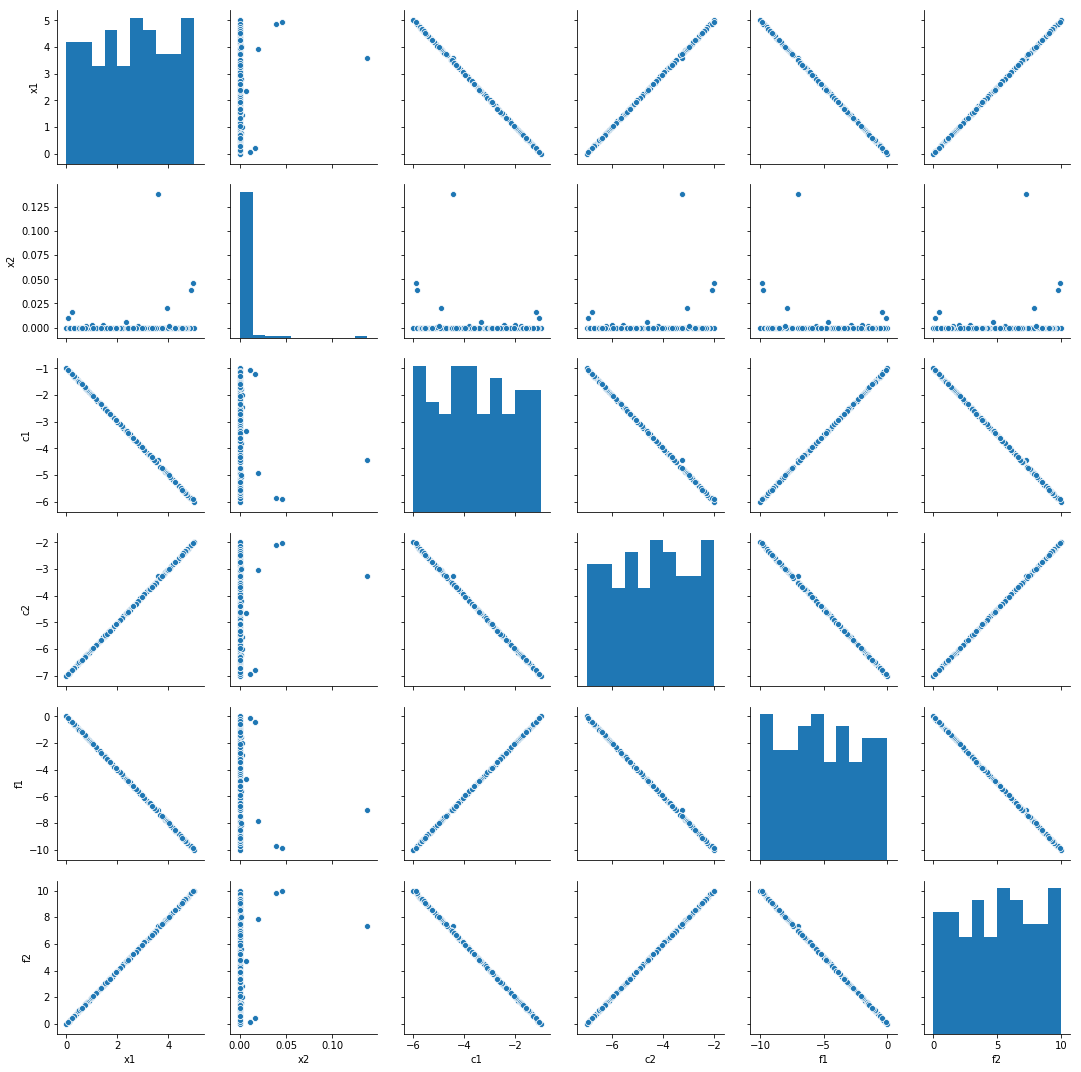

In [7]:
import seaborn as sns
sns.pairplot(df)
